<a href="https://colab.research.google.com/github/Binisha1/NLP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,f1_score,ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = df[['text', 'airline_sentiment']].copy()

In [7]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


<Axes: >

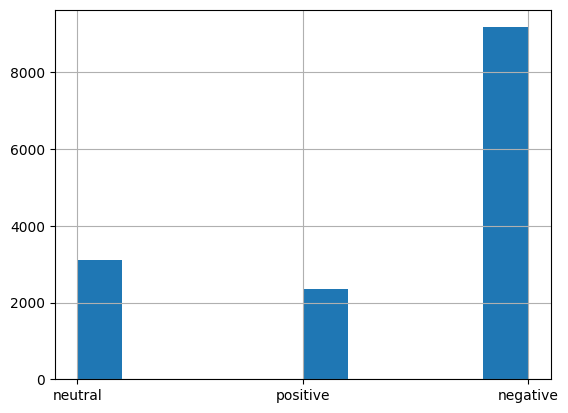

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_map = {'negative': 0, 'neutral': 2, 'positive': 1}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,text,airline_sentiment,target
0,@VirginAmerica What @dhepburn said.,neutral,2
1,@VirginAmerica plus you've added commercials t...,positive,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,2
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [11]:
df_train,df_test = train_test_split(df,test_size=0.2)

In [12]:
df_train.head()

,text,airline_sentiment,target
750,@united you are offering us 8 rooms for 32 peo...,negative,0
6875,@JetBlue JFK NYC staff is amazing. The #lax Je...,negative,0
7598,"@JetBlue well, the last update was in the righ...",positive,1
14124,@AmericanAir flight 3056 still sitting at DFW ...,negative,0
6187,@southwestair is your companion pass broken to...,neutral,2


In [13]:
vectorizer = TfidfVectorizer(max_features = 2000)

In [14]:
X_train = vectorizer.fit_transform(df_train['text'])

In [15]:
X_train

<11712x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 167612 stored elements in Compressed Sparse Row format>

In [16]:
X_test = vectorizer.transform(df_test['text'])

In [17]:
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train,Y_train)
print("Train accuracy: ",model.score(X_train,Y_train))
print("Test accuracy: ",model.score(X_test,Y_test))

Train accuracy:  0.8551058743169399
Test accuracy:  0.8077185792349727


In [19]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC: ",roc_auc_score(Y_train,Pr_train,multi_class='ovo'))
print("Test AUC: ",roc_auc_score(Y_test,Pr_test,multi_class='ovo'))

Train AUC:  0.9419728471968288
Test AUC:  0.8971230649347186


In [20]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print("Train F1: ",f1_score(Y_train,P_train,average='macro'))
print("Test F1: ",f1_score(Y_test,P_test,average='macro'))

Train F1:  0.8060382854909464
Test F1:  0.7291089886010363


In [21]:
cm = confusion_matrix(Y_test,P_test,normalize = 'true')
cm

array([[0.93223928, 0.01482266, 0.05293806],
       [0.23965142, 0.63180828, 0.12854031],
       [0.38275862, 0.07586207, 0.54137931]])

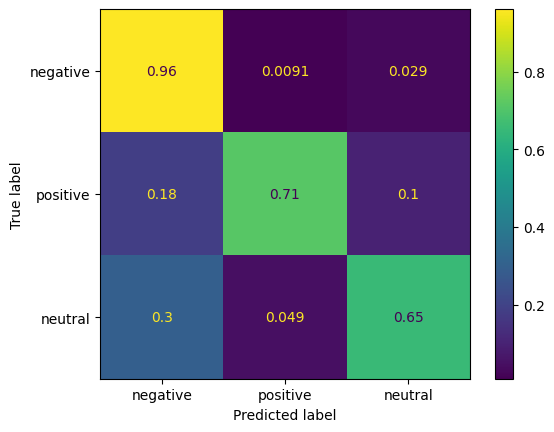

In [24]:
cm = confusion_matrix(Y_train,P_train,normalize='true')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['negative','positive','neutral'])
disp.plot()

plt.show()

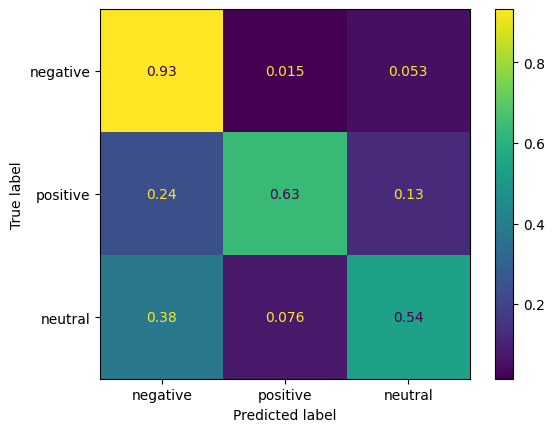

In [25]:
cm = confusion_matrix(Y_test,P_test,normalize='true')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['negative','positive','neutral'])
disp.plot()

plt.show()

In [30]:
binary_target_list = [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test =df_test[df_test['target'].isin(binary_target_list)]

In [31]:
df_b_train.head()

,text,airline_sentiment,target
750,@united you are offering us 8 rooms for 32 peo...,negative,0
6875,@JetBlue JFK NYC staff is amazing. The #lax Je...,negative,0
7598,"@JetBlue well, the last update was in the righ...",positive,1
14124,@AmericanAir flight 3056 still sitting at DFW ...,negative,0
1839,@united Pushing 2 hours on hold. Priceless. ...,negative,0


In [35]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [36]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [37]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train,Y_train)
print("Train accuracy: ",model.score(X_train,Y_train))
print("Test accuracy: ",model.score(X_test,Y_test))

Train accuracy:  0.9301642554117263
Test accuracy:  0.9182282793867121


In [38]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]
print("Train AUC: ",roc_auc_score(Y_train,Pr_train))
print("Test AUC: ",roc_auc_score(Y_test,Pr_test))

Train AUC:  0.9777431688823148
Test AUC:  0.9577406634673162


In [39]:
model.coef_

array([[-0.35434257,  0.44072416, -0.29834865, ..., -0.05584223,
         0.0883884 , -0.78338624]])

(array([  1.,   1.,   2.,   3.,   1.,  14.,  28.,  61., 198., 788., 545.,
        200.,  87.,  41.,  11.,   3.,   4.,   4.,   2.,   1.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.30179276, -3.88114948, -3.46050619, -3.03986291, -2.61921962,
        -2.19857634, -1.77793305, -1.35728976, -0.93664648, -0.51600319,
        -0.09535991,  0.32528338,  0.74592666,  1.16656995,  1.58721323,
         2.00785652,  2.4284998 ,  2.84914309,  3.26978638,  3.69042966,
         4.11107295,  4.53171623,  4.95235952,  5.3730028 ,  5.79364609,
         6.21428937,  6.63493266,  7.05557594,  7.47621923,  7.89686252,
         8.3175058 ]),
 <BarContainer object of 30 artists>)

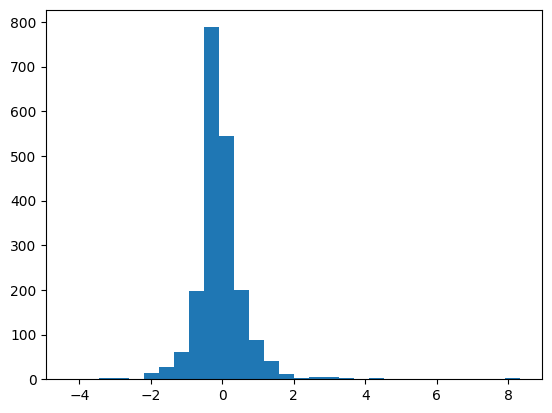

In [42]:
plt.hist(model.coef_[0],bins=30)

In [43]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'you': 1992,
 'are': 179,
 'offering': 1239,
 'us': 1866,
 'rooms': 1490,
 'for': 757,
 '32': 41,
 'people': 1310,
 'fail': 674,
 'jetblue': 977,
 'jfk': 979,
 'nyc': 1233,
 'staff': 1647,
 'is': 961,
 'amazing': 142,
 'the': 1733,
 'lax': 1016,
 'sending': 1549,
 'an': 149,
 'email': 607,
 'with': 1949,
 'details': 531,
 'but': 304,
 'it': 967,
 'was': 1899,
 'disappointing': 550,
 'experience': 658,
 'well': 1921,
 'last': 1013,
 'update': 1858,
 'in': 935,
 'right': 1485,
 'at': 200,
 'least': 1021,
 'll': 1055,
 'keep': 986,
 'my': 1188,
 'fingers': 717,
 'crossed': 469,
 'americanair': 145,
 'flight': 729,
 '3056': 37,
 'still': 1664,
 'sitting': 1592,
 'dfw': 532,
 'waiting': 1892,
 'baggage': 231,
 'to': 1770,
 'be': 243,
 'loaded': 1057,
 'pushing': 1407,
 'hours': 903,
 'on': 1250,
 'hold': 887,
 'http': 910,
 'co': 390,
 've': 1879,
 'been': 247,
 'trying': 1813,
 'reach': 1424,
 'your': 1994,
 'customer': 477,
 'service': 1555,
 'two': 1827,
 'days': 494,
 

In [48]:
#weights for each owrd
threshold = 2
print("Most positive words: ")
for word,index in word_index_map.items():
    if model.coef_[0][index] > threshold:
        print(word,model.coef_[0][index])

Most positive words: 
jetblue 3.1756020017890085
amazing 3.8446787883894165
great 5.6852831605553815
southwestair 2.8757073457650213
cool 2.1776147703270503
good 2.7704724364101443
appreciate 2.9718232387462065
thank 8.317505800600678
thanks 8.198596051578459
nice 2.026675118260334
thx 2.8439455283600874
worries 2.785190473426461
best 3.477082819724554
virginamerica 3.4691481301253106
awesome 4.315967553472379
love 4.122941645862023
excellent 2.8748024271899704
wonderful 2.30625869340108
kudos 2.8271594061387435


In [49]:
print("Most negative words: ")
for word, index in word_index_map.items():
    if model.coef_[0][index] < -threshold:
        print(word, model.coef_[0][index])

Most negative words: 
hours -3.3090685924687486
hold -2.647266896084911
delay -2.1026988968273366
no -3.6795123836072094
not -4.301792763098971
delayed -2.746351449392998
luggage -2.078435752296217
why -2.4387563135756123
hour -2.141780939046258
cancelled -2.624651237553541
worst -3.2223653730136843
